In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import root_pandas
import pandas as pd
import uproot
import numpy as np
from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.patches import Rectangle
from matplotlib.legend_handler import HandlerBase
import os

Welcome to JupyROOT 6.20/04


In [3]:
def plot_xyprojection(xdata, ydata, hitcolor, hitlabel, hitsize=0.001, savebool=True, savename='projectionplot.pdf', xlimlow=0.0, xlimup=0.0, ylimlow=0.0, ylimup=0.0, legendloc=2):
    fig, ax = plt.subplots()
    x = xdata
    y = ydata
    
    circle1 = plt.Circle((0, 0), 44.85, color='black', fill=False, ls='--', lw=0.75, label='TPC cage')
    circle2 = plt.Circle((0, 0), 109.4, color='black', fill=False, ls='--', lw=0.75)
    
    tpchits = ax.scatter(x, y, marker='.', s = hitsize, color=hitcolor , label=hitlabel)
    ax.set_xlabel('$x$ / cm', fontsize=25)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.set_ylabel('$y$ / cm', fontsize=25)
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    if xlimlow and xlimup:
        ax.set_xlim(xlimlow, xlimup)
    if ylimlow and ylimup:
        ax.set_ylim(ylimlow, ylimup)
    
    ax.set_aspect('equal')
    ax.tick_params(labelsize=25)
    
    tpccircle = ax.add_artist(circle1)
    ax.add_artist(circle2)
    
    fig.set_size_inches(10, 10)
    plt.title('Readout plane projection', fontsize=25)
    lgnd = plt.legend(handles=[tpchits, tpccircle],loc=legendloc, prop={'size':15})
    lgnd.legendHandles[0]._sizes = [35]
    fig.tight_layout()
    if savebool==True:
        plt.savefig(savename) 
    plt.show()
    plt.close()

In [4]:
def plot_sideprojection(zdata, sidedata, sidename,hitcolor, hitlabel, hitsize=0.001, savebool=True, savename='projectionplot.pdf', zlimlow=0.0, zlimup=0.0, sidelimlow=0.0, sidelimup=0.0):
    fig, ax = plt.subplots()
    x = zdata
    y = sidedata
    
    rect1 = plt.Rectangle((-83.12,-109.4), 241.69, 218.8 ,linewidth=0.75,edgecolor='black',facecolor='none', ls='--', label='TPC cage')
    #plt.vlines(x=0, ymin=-109.4, ymax=109.4, lw=0.75, ls='--')
    #plt.vlines(x=241.69, ymin=-109.4, ymax=109.4, lw=0.75, ls='--')
    
    tpchits = ax.scatter(x, y, marker='.', s = hitsize, color=hitcolor , label=hitlabel)
    ax.set_xlabel('$z$ / cm', fontsize=25)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.set_ylabel('$'+sidename+'$ / cm', fontsize=25)
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    if zlimlow and zlimup:
        ax.set_xlim(zlimlow, zlimup)
    if sidelimlow and sidelimup:
        ax.set_ylim(sidelimlow, sidelimup)
    
    ax.set_aspect('equal')
    ax.tick_params(labelsize=25)
    
    tpccage = ax.add_artist(rect1)
    
    fig.set_size_inches(15, 15)
    plt.title('Side View of TPC Volume', fontsize=25)
    # lgnd = plt.legend(handles=[tpchits, tpccage],loc=2, prop={'size':15})
    # lgnd.legendHandles[0]._sizes = [35]
    fig.tight_layout()
    if savebool==True:
        plt.savefig(savename) 
    plt.show()
    plt.close()

## Defining Colormaps

In [5]:
cdict1 = {'red':  (#(0.0, 0.729, 0.729),
                   #(0.04, 0.682, 0.682),
                   #(0.12, 0.627, 0.627),
                   (0.00, 0.584, 0.584),
                   (0.10, 0.545, 0.545),
                   (0.20, 0.502, 0.502),
                   (0.30, 0.475, 0.475),
                   (0.40, 0.435, 0.435),
                   (0.50, 0.400, 0.400),
                   (0.60, 0.373, 0.373),
                   (0.70, 0.306, 0.306),
                   (0.80, 0.224, 0.224),
                   (0.90, 0.192, 0.192),
                   (1.00, 0.165, 0.165)),

         'green': (#(0.00, 0.867, 0.867),
                   #(0.04, 0.835, 0.835),
                   #(0.12, 0.800, 0.800),
                   (0.00, 0.765, 0.765),
                   (0.10, 0.729, 0.729),
                   (0.20, 0.694, 0.694),
                   (0.30, 0.659, 0.659),
                   (0.40, 0.627, 0.627),
                   (0.50, 0.596, 0.596),
                   (0.60, 0.549, 0.549),
                   (0.70, 0.498, 0.498),
                   (0.80, 0.404, 0.404),
                   (0.90, 0.373, 0.373),
                   (1.0 , 0.341, 0.341)),

         'blue':  (#(0.00, 0.949, 0.949),
                   #(0.04, 0.933, 0.933),
                   #(0.12, 0.914, 0.914),
                   (0.00, 0.894, 0.894),
                   (0.10, 0.871, 0.871),
                   (0.20, 0.843, 0.843),
                   (0.30, 0.808, 0.808),
                   (0.40, 0.788, 0.788),
                   (0.50, 0.765, 0.765),
                   (0.60, 0.729, 0.729),
                   (0.70, 0.686, 0.686),
                   (0.80, 0.588, 0.588),
                   (0.90, 0.553, 0.553),
                   (1.00, 0.522, 0.522))
        }
blue_tableau = LinearSegmentedColormap('TableauBlue', cdict1)


In [6]:
cdict2 = {'red':  (#(0.0, 0.729, 0.729),
                   #(0.04, 0.682, 0.682),
                   #(0.12, 0.627, 0.627),
                   (0.00, 0.906, 0.906),
                   (0.10, 0.867, 0.867),
                   (0.20, 0.831, 0.831),
                   (0.30, 0.792, 0.792),
                   (0.40, 0.753, 0.753),
                   (0.50, 0.714, 0.714),
                   (0.60, 0.663, 0.663),
                   (0.70, 0.608, 0.608),
                   (0.80, 0.561, 0.561),
                   (0.90, 0.522, 0.522),
                   (1.00, 0.486, 0.486)),

         'green': (#(0.00, 0.867, 0.867),
                   #(0.04, 0.835, 0.835),
                   #(0.12, 0.800, 0.800),
                   (0.00, 0.733, 0.733),
                   (0.10, 0.686, 0.686),
                   (0.20, 0.639, 0.639),
                   (0.30, 0.592, 0.592),
                   (0.40, 0.545, 0.545),
                   (0.50, 0.498, 0.498),
                   (0.60, 0.459, 0.459),
                   (0.70, 0.420, 0.420),
                   (0.80, 0.380, 0.380),
                   (0.90, 0.341, 0.341),
                   (1.0 , 0.302, 0.302)),

         'blue':  (#(0.00, 0.949, 0.949),
                   #(0.04, 0.933, 0.933),
                   #(0.12, 0.914, 0.914),
                   (0.00, 0.859, 0.859),
                   (0.10, 0.812, 0.812),
                   (0.20, 0.765, 0.765),
                   (0.30, 0.725, 0.725),
                   (0.40, 0.682, 0.682),
                   (0.50, 0.643, 0.643),
                   (0.60, 0.616, 0.616),
                   (0.70, 0.592, 0.592),
                   (0.80, 0.545, 0.545),
                   (0.90, 0.518, 0.518),
                   (1.00, 0.475, 0.475))
        }
purple_tableau = LinearSegmentedColormap('TableauPurple', cdict2)


In [7]:
cdict3 = {'red':  (#(0.0, 0.729, 0.729),
                   #(0.04, 0.682, 0.682),
                   #(0.12, 0.627, 0.627),
                   (0.00, 0.961, 0.961),
                   (0.10, 0.969, 0.969),
                   (0.20, 0.949, 0.949),
                   (0.30, 0.898, 0.898),
                   (0.40, 0.863, 0.863),
                   (0.50, 0.835, 0.835),
                   (0.60, 0.808, 0.808),
                   (0.70, 0.769, 0.769),
                   (0.80, 0.725, 0.725),
                   (0.90, 0.671, 0.671),
                   (1.00, 0.612, 0.612)),

         'green': (#(0.00, 0.867, 0.867),
                   #(0.04, 0.835, 0.835),
                   #(0.12, 0.800, 0.800),
                   (0.00, 0.647, 0.647),
                   (0.10, 0.541, 0.541),
                   (0.20, 0.439, 0.439),
                   (0.30, 0.353, 0.353),
                   (0.40, 0.271, 0.271),
                   (0.50, 0.184, 0.184),
                   (0.60, 0.114, 0.114),
                   (0.70, 0.106, 0.106),
                   (0.80, 0.098, 0.098),
                   (0.90, 0.086, 0.086),
                   (1.0 , 0.078, 0.078)),

         'blue':  (#(0.00, 0.949, 0.949),
                   #(0.04, 0.933, 0.933),
                   #(0.12, 0.914, 0.914),
                   (0.00, 0.612, 0.612),
                   (0.10, 0.490, 0.490),
                   (0.20, 0.380, 0.380),
                   (0.30, 0.282, 0.282),
                   (0.40, 0.208, 0.208),
                   (0.50, 0.145, 0.145),
                   (0.60, 0.102, 0.102),
                   (0.70, 0.090, 0.090),
                   (0.80, 0.102, 0.102),
                   (0.90, 0.122, 0.122),
                   (1.00, 0.137, 0.137))
        }
red_tableau = LinearSegmentedColormap('TableauRed', cdict3)


In [8]:
cdict4 = {'red':  ((0.00, 0.624, 0.624),
                   (0.20, 0.557, 0.557),
                   (0.40, 0.494, 0.494),
                   (0.60, 0.431, 0.431),
                   (0.80, 0.369, 0.369),
                   (0.99, 0.314, 0.314),
                   #(0.60, 0.259, 0.259),
                   #(0.70, 0.208, 0.208),
                   #(0.80, 0.161, 0.161),
                   #(0.90, 0.118, 0.118),
                   (1.00, 0.000, 0.000)),

         'green': ((0.00, 0.624, 0.624),
                   (0.20, 0.557, 0.557),
                   (0.40, 0.494, 0.494),
                   (0.60, 0.431, 0.431),
                   (0.80, 0.369, 0.369),
                   (0.99, 0.314, 0.314),
                   #(0.60, 0.259, 0.259),
                   #(0.70, 0.208, 0.208),
                   #(0.80, 0.161, 0.161),
                   #(0.90, 0.118, 0.118),
                   (1.0 , 0.000, 0.000)),

         'blue':  ((0.00, 0.624, 0.624),
                   (0.20, 0.557, 0.557),
                   (0.40, 0.494, 0.494),
                   (0.60, 0.431, 0.431),
                   (0.80, 0.369, 0.369),
                   (0.99, 0.314, 0.314),
                   #(0.60, 0.259, 0.259),
                   #(0.70, 0.208, 0.208),
                   #(0.80, 0.161, 0.161),
                   #(0.90, 0.118, 0.118),
                   (1.00, 0.000, 0.000))
        }
grey_tableau = LinearSegmentedColormap('TableauGrey', cdict4)

## Plotting Functions

In [9]:
class HandlerColormap(HandlerBase):
    def __init__(self, cmap, num_stripes=8, **kw):
        HandlerBase.__init__(self, **kw)
        self.cmap = cmap
        self.num_stripes = num_stripes
    def create_artists(self, legend, orig_handle, 
                       xdescent, ydescent, width, height, fontsize, trans):
        stripes = []
        for i in range(self.num_stripes):
            s = Rectangle([xdescent + i * width / self.num_stripes, ydescent], 
                          width / self.num_stripes, 
                          height, 
                          fc=self.cmap((2 * i + 1) / (2 * self.num_stripes)), 
                          transform=trans)
            stripes.append(s)
        return stripes

In [10]:
def eventplot(dataFrame, eventtype):
    
    fig, ax = plt.subplots()
    x = dataFrame['z']
    y = dataFrame['y']
    eventtypenames = ['All', r'$\Upsilon$(4S)', 'Bhabha', r'$\gamma\gamma$', r'$\mu^+ \mu^-$', r'$\tau^+ \tau^-$', r'$u \bar{u}$', r'$d \bar{d}$', r'$s \bar{s}$', r'$c \bar{c}$', r'$e^+e^-e^+e^-$', r'$e^+e^-\mu^+\mu^-$']
    colormaps=[grey_tableau, blue_tableau, red_tableau, red_tableau, red_tableau, purple_tableau, purple_tableau, purple_tableau, purple_tableau, red_tableau, red_tableau]
    eventIndex=dataFrame['eventIndex']
    maxIndex = eventIndex.max()
    upsiindex = eventIndex
    if eventtype == 1:
        upsiindex = eventIndex/(dataFrame['eventIndex'].iloc[0])
        upsiindex = 1- (upsiindex % 1)
    colors = [upsiindex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex]
    
    rect1 = plt.Rectangle((-241.69,-109.4), 725.07, 218.8 ,linewidth=0.75,edgecolor='black',facecolor='none', ls='--', label='TPC cage')
    plt.vlines(x=0, ymin=-109.4, ymax=109.4, lw=0.75, ls='--')
    plt.vlines(x=241.69, ymin=-109.4, ymax=109.4, lw=0.75, ls='--')    
    
    if eventtype == 0:
        for i in range(1,12):
            dataTrue = dataFrame[dataFrame['eventID']==i]
            x = dataTrue["z"]
            y = dataTrue["y"]
            eventIndex=dataTrue["eventIndex"]
            maxIndex = eventIndex.max()
            if i==1:
                upsiindex = eventIndex/(dataFrame['eventIndex'].iloc[0])
                upsiindex = 1- (upsiindex % 1)
            colors = [upsiindex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex]
    
            tpchits = ax.scatter(x, y, marker='.', s=0.001, c=colors[i-1], cmap=colormaps[i-1], vmin=0.0, vmax=1.0)

    else:
        tpchits = ax.scatter(x, y, marker='.', s = 0.001, c=colors[eventtype-1], cmap=colormaps[eventtype-1], vmin=0.0, vmax=1.0)
        
    ax.set_xlabel('$z$ / cm', fontsize=25)
    ax.xaxis.set_major_locator(plt.MaxNLocator(7))
    ax.xaxis.set_minor_locator(MultipleLocator(10))
    ax.set_xlim(-250, 490)

    ax.set_ylabel('$y$ / cm', fontsize=25)
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax.yaxis.set_minor_locator(MultipleLocator(30))
    ax.set_ylim(-128, 128)
    
    ax.set_aspect('equal')
    ax.tick_params(labelsize=25)
    
    tpccage = ax.add_artist(rect1)
    
    cmaps = [grey_tableau, blue_tableau, purple_tableau, red_tableau]
    cmap_labels = [r"$\Upsilon$(4S)","Bhabhas", r"$q\bar{q}$ continuum", "QED"]
    # create proxy artists as handles:
    cmap_handles = [Rectangle((0, 0), 1, 1) for _ in cmaps]
    handler_map = dict(zip(cmap_handles, 
                       [HandlerColormap(cm, num_stripes=8) for cm in cmaps]))
    #cmap_labels.append("Upsilon(4S)")
    #cmap_handels.append(tpcsimhits)
    
    plt.legend(handles=cmap_handles, 
           labels=cmap_labels, 
           handler_map=handler_map,
           bbox_to_anchor=(1.23, 1),
           fontsize=15)
        
    fig.set_size_inches(15, 5.5)
    plt.title(eventtypenames[eventtype]+' events', fontsize=25)
    # lgnd = plt.legend(handles=[tpchits, tpccage],loc=2, prop={'size':15})
    # lgnd.legendHandles[0]._sizes = [35]
    fig.tight_layout()

    plt.show()
    plt.close()
    return fig

## Creating Numerous Displays

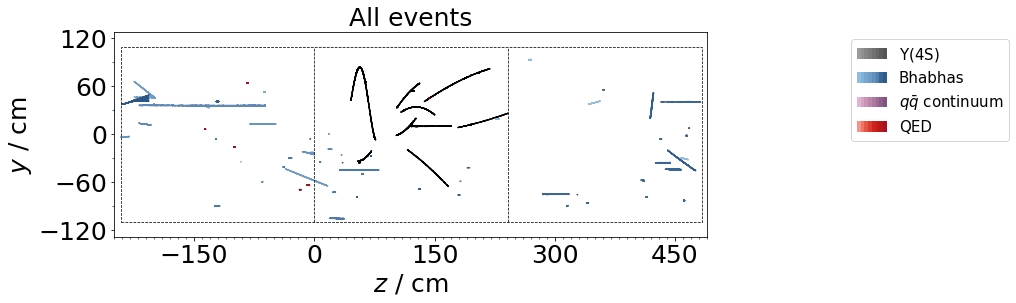

KeyboardInterrupt: 

In [11]:
#fig = eventplot(TPC, 0)
#fig.savefig('TestDisplay.png')

extensions = ('.root')
cut = 0
for f in os.listdir('dataTPC'):
    ext = os.path.splitext(f)[-1].lower()
    if ext in extensions:
        seed = f[15:-5]
        f= 'dataTPC/'+f
        TPC = root_pandas.read_root(f, 'tree')
        fig = eventplot(TPC, 0)
        fig.savefig('dataTPC/DisplayAll_'+seed+'.png')
        cut +=1
        if cut > 20:
            break


# Histogramming number of Hits

In [12]:
def count_tracks(filename):
    trackarray = []
    filename = 'dataTPC/'+filename
    TPC = root_pandas.read_root(filename, 'tree')
    TPC = TPC[(TPC['z']>=0) & (TPC['z']<=241.69)]
    TPCUniqueTracks = TPC.groupby(['eventID', 'eventIndex', 'trackID', 'pdg']).size().reset_index().rename(columns={0:'count'})
    TPCUniqueTracks = TPCUniqueTracks[(TPCUniqueTracks['pdg'] != 11) | ((TPCUniqueTracks['pdg']==11) & (TPCUniqueTracks['eventID']==2) & (TPCUniqueTracks['trackID'] <=2)) | ((TPCUniqueTracks['pdg']==11) & (TPCUniqueTracks['eventID']!=2) & (TPCUniqueTracks['trackID'] <=4))]
    for p in range(1,12):
        Tracktype = TPCUniqueTracks[TPCUniqueTracks['eventID']==p]
        trackarray.append(len(Tracktype))
    return trackarray    

In [ ]:


tracks = np.zeros(shape=(11,101))

#tracklist = count_tracks('dataTPC/TPCEventOverlay3825921711.root')
#tracklist
i=0

for f in os.listdir('dataTPC'):
    tracklist = count_tracks(f)
    
    for j in range(0,11):
        tracks[j][i]=tracklist[j]
    i+=1
    
tracks[0][0]



In [ ]:
fig, ax = plt.subplots()
labels = [r'$\Upsilon$(4S)', 'Bhabha', r'$u \bar{u}$', r'$d \bar{d}$', r'$s \bar{s}$', r'$c \bar{c}$', r'$\gamma\gamma$', r'$\mu^+ \mu^-$', r'$\tau^+ \tau^-$', r'$e^+e^-e^+e^-$', r'$e^+e^-\mu^+\mu^-$']
colors = [(0.0, 0.0, 0.0), (0.165, 0.341, 0.522), (0.486, 0.302, 0.475), (0.561, 0.380, 0.545), (0.663, 0.459, 0.616), (0.753, 0.545, 0.682), (0.612, 0.078, 0.137), (0.725, 0.098, 0.102), (0.808, 0.114, 0.102), (0.863, 0.271, 0.208), (0.949, 0.439, 0.380)]
bins = []
for i in range(int(np.amax(tracks))+1):
    bins.append(i - 0.5)
n, axbins, patches = ax.hist([tracks[0], tracks[1], tracks[5], tracks[6], tracks[7], tracks[8], tracks[2], tracks[3], tracks[4], tracks[9], tracks[10]], bins=bins, stacked=True, label=labels, color=colors)

ax.set_xlabel(r'Number of Tracks', fontsize=15)
ax.set_ylabel('entries', fontsize=15)
#ax.set_ylim(0, 60)

plt.figtext(.70, .82, r'mean = $%.2f$' % (tracks[0].mean()), fontsize=11, color=colors[0])
plt.figtext(.70, .76, r'mean = $%.2f$' % (tracks[1].mean()), fontsize=11, color=colors[1])
plt.figtext(.70, .70, r'mean = $%.2f$' % (tracks[5].mean()), fontsize=11, color=colors[2])
plt.figtext(.70, .64, r'mean = $%.2f$' % (tracks[6].mean()), fontsize=11, color=colors[3])
plt.figtext(.70, .58, r'mean = $%.2f$' % (tracks[7].mean()), fontsize=11, color=colors[4])
plt.figtext(.70, .52, r'mean = $%.2f$' % (tracks[8].mean()), fontsize=11, color=colors[5])
plt.figtext(.70, .46, r'mean = $%.2f$' % (tracks[2].mean()), fontsize=11, color=colors[6])
plt.figtext(.70, .40, r'mean = $%.2f$' % (tracks[3].mean()), fontsize=11, color=colors[7])
plt.figtext(.70, .34, r'mean = $%.2f$' % (tracks[4].mean()), fontsize=11, color=colors[8])
plt.figtext(.70, .28, r'mean = $%.2f$' % (tracks[9].mean()), fontsize=11, color=colors[9])
plt.figtext(.70, .22, r'mean = $%.2f$' % (tracks[10].mean()), fontsize=11, color=colors[10])


plt.title('Number of Tracks per Physics Event', fontsize=15)

handles, labels = ax.get_legend_handles_labels()
lgnd = ax.legend(handles, labels, bbox_to_anchor=(1.32, 1))
#fig.tight_layout()

plt.savefig('physicstracks_nocut.pdf',bbox_extra_artists=(lgnd,), bbox_inches='tight')

# Number of hits in Cells (2x2x2 cm^3)

In [53]:
def count_badcells(filename, cutvalue):
    filename = 'dataUpsilon4S/'+filename
    
    file = uproot.open(filename)
    tree = file["tree"]
    U4S = pd.DataFrame({subbranch: tree[f"TPCSimHits.{subbranch}"].array().content for subbranch in ["m_pdg", "m_x", "m_y", "m_z", "m_trackID"]})
    U4S['cellID'] = ((U4S['m_x']+128)/2).astype(int) + 128*((U4S['m_y']+128)/2).astype(int) + 128*128*((U4S['m_z']+83.12)/2).astype(int)
    
    U4S_BadCells = U4S.groupby(['cellID', 'm_trackID', 'm_pdg']).size().reset_index().rename(columns={0:'count'})
    U4S_BadCells = U4S_BadCells[U4S_BadCells['count'] > cutvalue]
    U4S_BadCells = U4S_BadCells.groupby(['m_trackID', 'm_pdg']).size().reset_index().rename(columns={0:'count'})
    
    #U4S_BadHits = U4S[U4S['cellID'].isin(U4S_BadCells['cellID'])]
    
    
    return U4S_BadCells['count'].to_list(), U4S_BadCells['m_pdg'].to_list()
    

In [59]:
extensions = ('.root')
pdgcodes = []
cellcounts = []

for f in os.listdir('dataUpsilon4S'):
    ext = os.path.splitext(f)[-1].lower()
    if ext in extensions:
        retcount, retpdg = count_badcells(f, 1000)
        cellcounts.extend(retcount)
        pdgcodes.extend(retpdg)
        #print(f)
        
        

In [68]:
uniquepdgs = list(set(pdgcodes))
uniquepdgs

[321, 2212, 1000010020, 11, 13, 1000090190, 1000180400, -13, -11, -2212]

In [80]:
pdglabels = [r'F19', r'Ar40', r'$K$', r'$p$', r'$d$', r'$\bar{p}$', r'$\mu^+$', r'$\mu^-$', r'$e^+$', r'$e^-$']

In [71]:
cells321 = []
cells2212 = []
cells1000010020 = []
cells11 = []
cells13 = []
cells1000090190 = []
cells1000180400 = []
cells13b = []
cells11b = []
cells2212b = []

for i in range(len(cellcounts)):
    if pdgcodes[i] == 321:
        cells321.append(cellcounts[i])
    elif pdgcodes[i] == 2212:
        cells2212.append(cellcounts[i])
    elif pdgcodes[i] == 1000010020:
        cells1000010020.append(cellcounts[i])
    elif pdgcodes[i] == 11:
        cells11.append(cellcounts[i])
    elif pdgcodes[i] == 13:
        cells13.append(cellcounts[i])
    elif pdgcodes[i] == 1000090190:
        cells1000090190.append(cellcounts[i])
    elif pdgcodes[i] == 1000180400:
        cells1000180400.append(cellcounts[i])
    elif pdgcodes[i] == -13:
        cells13b.append(cellcounts[i])
    elif pdgcodes[i] == -11:
        cells11b.append(cellcounts[i])
    elif pdgcodes[i] == -2212:
        cells2212b.append(cellcounts[i])
        
cells11

[1,
 1,
 1,
 2,
 4,
 1,
 4,
 2,
 1,
 1,
 6,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 4,
 4,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 6,
 5,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 3,
 1,
 2,
 3,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 3,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 2,
 1,
 1,


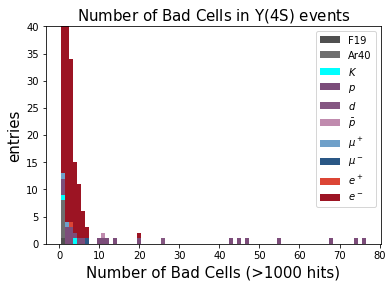

In [92]:
fig, ax = plt.subplots()
pdglabels = [r'F19', r'Ar40', r'$K$', r'$p$', r'$d$', r'$\bar{p}$', r'$\mu^+$', r'$\mu^-$', r'$e^+$', r'$e^-$']
colors = [(0.314, 0.314, 0.314), (0.431, 0.431, 0.431), 'cyan', (0.486, 0.302, 0.479), (0.522, 0.341, 0.510), (0.753, 0.545, 0.682), (0.435, 0.627, 0.788), (0.165, 0.341, 0.522), (0.863, 0.271, 0.208), (0.612, 0.078, 0.137)]
bins = []
for i in range(int(np.amax(cellcounts))+1):
    bins.append(i + 0.5)
n, axbins, patches = ax.hist([cells1000090190, cells1000180400, cells321, cells2212, cells1000010020, cells2212b, cells13b, cells13, cells11b, cells11], bins=bins, stacked=True, label=pdglabels, color=colors)

ax.set_xlabel(r'Number of Bad Cells (>1000 hits)', fontsize=15)
ax.set_ylabel('entries', fontsize=15)
ax.set_ylim(0, 40)

plt.title(r'Number of Bad Cells in $\Upsilon$(4S) events', fontsize=15)

#handles, labels = ax.get_legend_handles_labels()
#lgnd = ax.legend(handles, labels, bbox_to_anchor=(1.32, 1))
#fig.tight_layout()
plt.legend()

plt.savefig('cellcounts_cut.pdf')
plt.show()
plt.close()

In [14]:
file = uproot.open("dataUpsilon4Ss.root")
tree = file["tree"]

In [15]:
U4S = pd.DataFrame({subbranch: tree[f"TPCSimHits.{subbranch}"].array().content for subbranch in ["m_pdg", "m_x", "m_y", "m_z", "m_trackID"]})
U4S

,m_pdg,m_x,m_y,m_z,m_trackID
0,211,-44.686827,-3.856113,48.832157,19
1,211,-44.698451,-3.842776,48.849303,19
2,211,-44.698937,-3.842218,48.850020,19
3,211,-44.697394,-3.843989,48.847744,19
4,211,-44.701436,-3.839350,48.853707,19
...,...,...,...,...,...
19362375,11,-29.921590,-35.287868,98.429117,19958
19362376,11,-29.921748,-35.287838,98.429102,19958
19362377,11,-29.922984,-35.287603,98.428989,19958
19362378,11,-29.924847,-35.287247,98.428817,19958


In [16]:
U4S['cellID'] = ((U4S['m_x']+128)/2).astype(int) + 128*((U4S['m_y']+128)/2).astype(int) + 128*128*((U4S['m_z']+83.12)/2).astype(int)
U4S

,m_pdg,m_x,m_y,m_z,m_trackID,cellID
0,211,-44.686827,-3.856113,48.832157,19,1072937
1,211,-44.698451,-3.842776,48.849303,19,1072937
2,211,-44.698937,-3.842218,48.850020,19,1072937
3,211,-44.697394,-3.843989,48.847744,19,1072937
4,211,-44.701436,-3.839350,48.853707,19,1072937
...,...,...,...,...,...,...
19362375,11,-29.921590,-35.287868,98.429117,19958,1480497
19362376,11,-29.921748,-35.287838,98.429102,19958,1480497
19362377,11,-29.922984,-35.287603,98.428989,19958,1480497
19362378,11,-29.924847,-35.287247,98.428817,19958,1480497


In [23]:
U4S_BadCells = U4S.groupby(['cellID', 'm_trackID', 'm_pdg']).size().reset_index().rename(columns={0:'count'})
U4S_BadCells = U4S_BadCells[U4S_BadCells['count'] > 1000]
U4S_BadCells = U4S_BadCells.groupby(['m_trackID', 'm_pdg']).size().reset_index().rename(columns={0:'count'})
U4S_BadCells

,m_trackID,m_pdg,count
0,9,321,1
1,18,11,1
2,19,11,2
3,20,11,1
4,21,11,2
...,...,...,...
779,40324,11,1
780,40900,11,1
781,40920,11,1
782,40941,11,1


In [24]:
pdglist = U4S_BadCells['m_pdg'].to_list()
pdglist

[321,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 2212,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 1000180400,
 11,
 11,
 2212,
 11,
 2212,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 2212,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 2212,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 1000180400,
 11,
 11,
 11,
 11,
 -13,
 11,
 11,
 11,
 11,
 2212,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 2212,
 11,
 11,
 11,
 11,
 11,
 11

In [18]:
U4S_BadHits = U4S[U4S['cellID'].isin(U4S_BadCells['cellID'])]
U4S_BadHits

,m_pdg,m_x,m_y,m_z,m_trackID,cellID
8665,2212,-26.005605,38.195626,133.978030,51,1780146
8666,2212,-26.007132,38.197042,133.977094,51,1780146
8675,2212,-26.022209,38.211010,133.967856,51,1780146
8676,2212,-26.017541,38.206685,133.970716,51,1780146
8677,2212,-26.026813,38.215275,133.965035,51,1780146
...,...,...,...,...,...,...
19338722,11,-42.047218,22.050784,-17.134655,8810,533930
19338723,11,-42.047082,22.051200,-17.136150,8810,533930
19338724,11,-42.046736,22.052260,-17.139963,8810,533930
19338725,11,-42.046716,22.052320,-17.140182,8810,533930


In [19]:
U4S_BadPDGs = U4S_BadHits.groupby(['m_trackID', 'm_pdg']).size().reset_index().rename(columns={0:'count'})
U4S_BadPDGs

,m_trackID,m_pdg,count
0,3,-211,235
1,3,211,135
2,4,-211,527
3,4,-11,211
4,4,11,43
...,...,...,...
7780,42441,11,75
7781,42442,11,67
7782,42504,11,174
7783,42505,11,49
